In [113]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

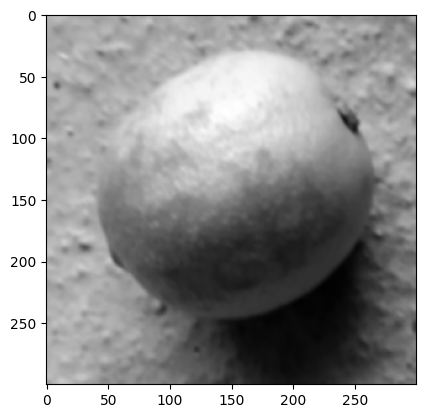

In [80]:
img = cv2.imread('/content/drive/MyDrive/Visión Por computadora/SEM12/Lemon_quality/bad_quality/bad_quality_129.jpg', cv2.IMREAD_GRAYSCALE)
img_blur = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(img_blur, cmap='gray')

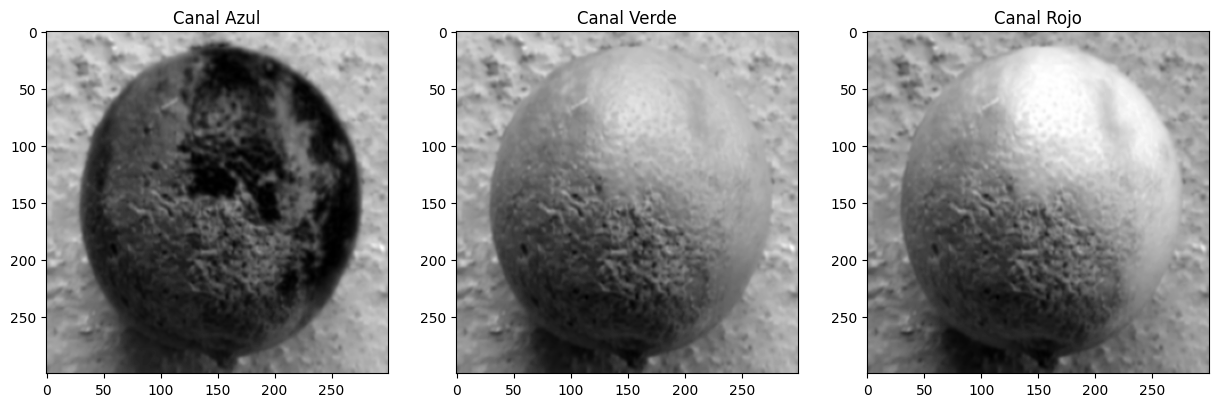

In [84]:
# Carga la imagen en formato de color (BGR).
img = cv2.imread('/content/drive/MyDrive/Visión Por computadora/SEM12/Lemon_quality/bad_quality/bad_quality_283.jpg')

# Aplica el suavizado en los tres canales de color.
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Divide la imagen en los tres canales B, G, R.
blue_channel, green_channel, red_channel = cv2.split(img_blur)

# Muestra cada canal individualmente.
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(blue_channel, cmap='gray')
plt.title("Canal Azul")

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title("Canal Verde")

plt.subplot(1, 3, 3)
plt.imshow(red_channel, cmap='gray')
plt.title("Canal Rojo")

plt.show()


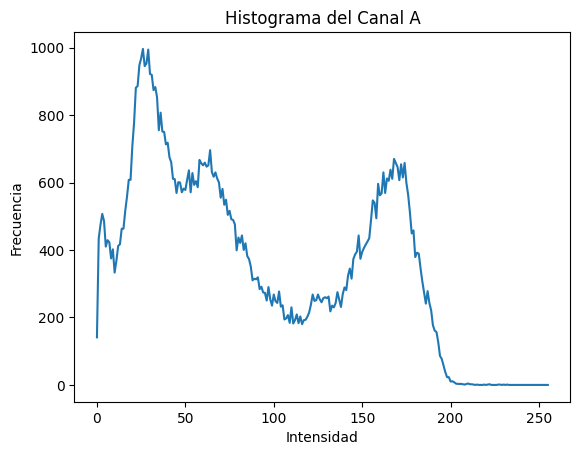

In [85]:
# Calcula el histograma del canal A
hist_A = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])

# Visualiza el histograma
plt.plot(hist_A)
plt.title("Histograma del Canal A")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.show()


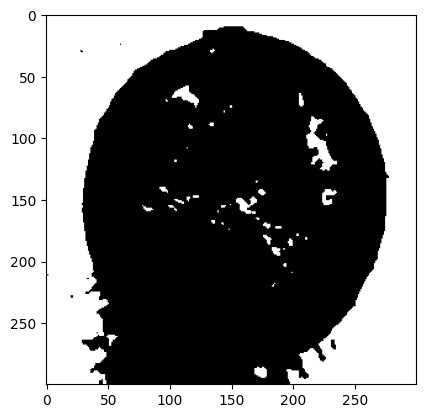

In [86]:
ret, th_otsu = cv2.threshold(blue_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(th_otsu, cmap='gray')


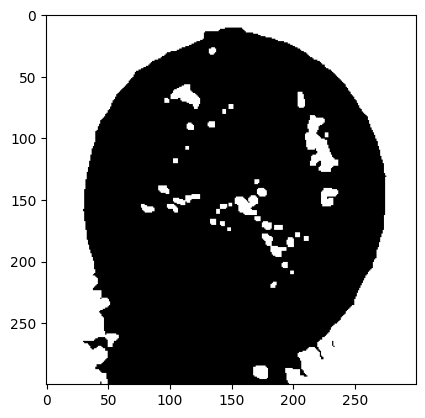

In [94]:
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(th_otsu, kernel, iterations=1)
plt.imshow(dilated, cmap='gray')


In [104]:
def readImg(img):
    img = cv2.imread(img)
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    # Verificar si la imagen tiene un solo canal antes de la conversión
    if len(img.shape) == 2:  # Esto significa que es una imagen de un solo canal
        img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    else:
        img_bgr = img  # Si ya está en BGR, no hace falta convertir
    blue_channel, green_channel, red_channel = cv2.split(img_blur)
    hist_A = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(th_otsu, kernel, iterations=1)
    return img_bgr, dilated

In [95]:
# Verificar si la imagen tiene un solo canal antes de la conversión
if len(img.shape) == 2:  # Esto significa que es una imagen de un solo canal
    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
else:
    img_bgr = img  # Si ya está en BGR, no hace falta convertir


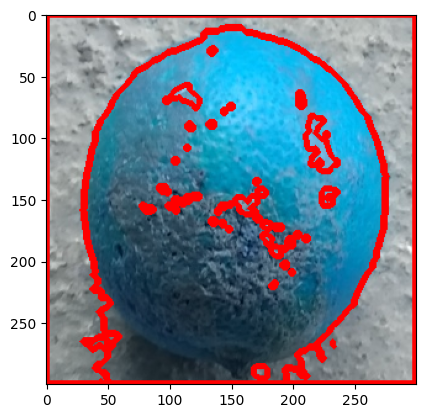

In [96]:
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.drawContours(img_bgr, contours, -1, (255, 0, 0), 3)
plt.imshow(contour_img)


In [97]:
perimeter = cv2.arcLength(contours[0], True)
print('Perimeter:', perimeter)
area = cv2.contourArea(contours[0])
print('Area:', area)

Perimeter: 37.899494767189026
Area: 98.5


In [98]:
def get_countour_area(gray_img):
    ret, th_otsu = cv2.threshold(blue_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(th_otsu, kernel, iterations=1)

    fnal= cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel, iterations=2)
    contours, hierarchy = cv2.findContours(fnal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    perimeter = cv2.arcLength(contours[0], True)
    area = cv2.contourArea(contours[0])
    return perimeter,area

In [107]:
import os

image_dir = '/content/drive/MyDrive/Visión Por computadora/SEM12/Lemon_quality/bad_quality/'


data = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_dir, filename)
        img, dilated = readImg(img_path)
        perimeter, area = get_countour_area(dilated)
        quality = 'bad'
        data.append({'Perimeter': perimeter, 'Area': area, 'Quality': quality})

df_lemon = pd.DataFrame(data)
print(df_lemon)

     Perimeter  Area Quality
0    37.899495  98.5     bad
1    37.899495  98.5     bad
2    37.899495  98.5     bad
3    37.899495  98.5     bad
4    37.899495  98.5     bad
..         ...   ...     ...
951  37.899495  98.5     bad
952  37.899495  98.5     bad
953  37.899495  98.5     bad
954  37.899495  98.5     bad
955  37.899495  98.5     bad

[956 rows x 3 columns]


In [110]:
import os

image_dir = '/content/drive/MyDrive/Visión Por computadora/SEM12/Lemon_quality/good_quality/'


data = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_dir, filename)
        img, dilated = readImg(img_path)
        perimeter, area = get_countour_area(dilated)
        quality = 'good'
        data.append({'Perimeter': perimeter, 'Area': area, 'Quality': quality})

df_lemon2 = pd.DataFrame(data)
print(df_lemon2)

      Perimeter  Area Quality
0     37.899495  98.5    good
1     37.899495  98.5    good
2     37.899495  98.5    good
3     37.899495  98.5    good
4     37.899495  98.5    good
...         ...   ...     ...
1128  37.899495  98.5    good
1129  37.899495  98.5    good
1130  37.899495  98.5    good
1131  37.899495  98.5    good
1132  37.899495  98.5    good

[1133 rows x 3 columns]


In [112]:
df_final= pd.concat([df_lemon, df_lemon2], ignore_index=True)
print(df_final)

      Perimeter  Area Quality
0     37.899495  98.5     bad
1     37.899495  98.5     bad
2     37.899495  98.5     bad
3     37.899495  98.5     bad
4     37.899495  98.5     bad
...         ...   ...     ...
2084  37.899495  98.5    good
2085  37.899495  98.5    good
2086  37.899495  98.5    good
2087  37.899495  98.5    good
2088  37.899495  98.5    good

[2089 rows x 3 columns]


In [119]:
import numpy as np

X = df_final[['Perimeter', 'Area']] # Use a list of column names
#X = np.hstack((X.values)) # Directly access the values of the selected columns
y = df_final['Quality']

print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC()
}

params = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': [1, 0.1, 0.01, 0.001]
    }
}


for model_name in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', models[model_name])
    ])

    grid_search = GridSearchCV(pipeline, params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Mejores parametros {model_name}: {grid_search.best_params_}")
    print(f"Mejor score {model_name}: {grid_search.best_score_}")

    y_pred = grid_search.predict(X_test)
    print(f"Reporte de clasificación {model_name}:\n{classification_report(y_test, y_pred)}")

      Perimeter  Area
0     37.899495  98.5
1     37.899495  98.5
2     37.899495  98.5
3     37.899495  98.5
4     37.899495  98.5
...         ...   ...
2084  37.899495  98.5
2085  37.899495  98.5
2086  37.899495  98.5
2087  37.899495  98.5
2088  37.899495  98.5

[2089 rows x 2 columns]
Mejores parametros RandomForest: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Mejor score RandomForest: 0.5463794798462775
Reporte de clasificación RandomForest:
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00       198
        good       0.53      1.00      0.69       220

    accuracy                           0.53       418
   macro avg       0.26      0.50      0.34       418
weighted avg       0.28      0.53      0.36       418



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mejores parametros SVC: {'classifier__C': 0.1, 'classifier__gamma': 1}
Mejor score SVC: 0.5463794798462775
Reporte de clasificación SVC:
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00       198
        good       0.53      1.00      0.69       220

    accuracy                           0.53       418
   macro avg       0.26      0.50      0.34       418
weighted avg       0.28      0.53      0.36       418



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


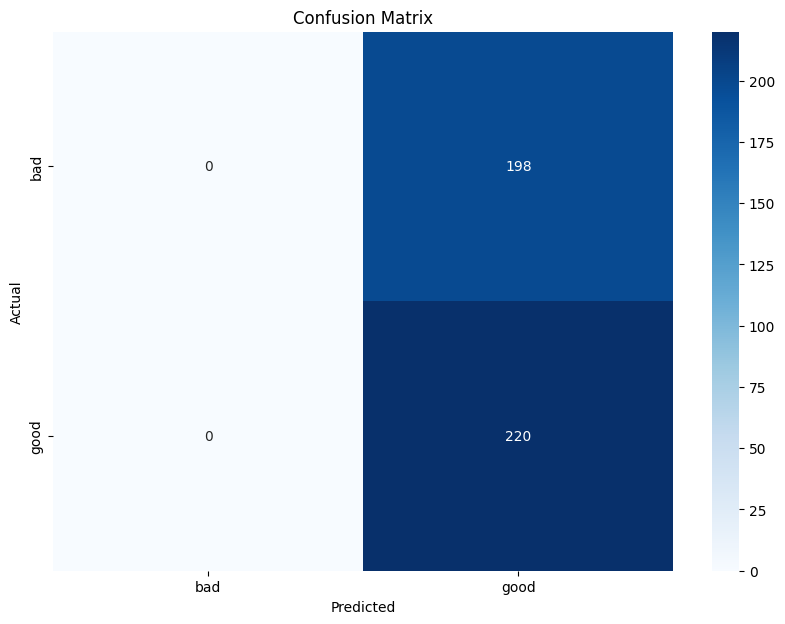

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()